# Figure 1: AP normalization - mouse gastrulation

In [ ]:
source(here::here("code/init.R"))

## Load data

In [ ]:
mcatac <- mcATAC::import_from_h5ad(here("data/gastrulation_atac.h5ad"))

• Reading
/net/mraid20/ifs/wisdom/tanay_lab/tgdata/users/aviezerl/proj/motif_reg/IQ-paper/data/gastrulation_atac.h5ad



• Setting egc cell size to 200159.2 (the 0.1 quantile of metacell sizes)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
✔ Successfully loaded an `McPeaks` object with 1439 metacells and 129963 ATAC peaks



In [ ]:
gsetroot(here("data/mm10"))

In [ ]:
mc_egc <- t(t(mcatac@mat) / colSums(mcatac@mat))
mcatac@egc <- mc_egc

In [ ]:
.misha$GROOT

[1] "/net/mraid20/ifs/wisdom/tanay_lab/tgdata/db/tgdb/mm10/trackdb"

## Normalize signal using 20K ATAC

In [ ]:
mcatac_norm <- normalize_egc(mcatac, "gastrulation_atac.marginal", window_size = 2e4)

ERROR: Error: Source of virtual track marginal was not recognized neither as a track nor as intervals. ("Interval gastrulation_atac.marginal does not exist")


## Mark constitutive 

We mark constitutive regions as those that are above -16 in all cell types (after regional normalization).

In [ ]:
mcatac@peaks$const <- calc_const_peaks(mcatac_norm, -16)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


In [ ]:
mcatac_norm@peaks$const <- mcatac@peaks$const

In [ ]:
sum(mcatac_norm@peaks$const)

[1] 13290

## Normalize constitutive

In [ ]:
mcatac_norm_const <- normalize_const(mcatac_norm, "Epiblast", 1)

Warning message in .M2v(x):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


In [ ]:
prob1_thresh <- quantile(mcatac_norm_const@egc[mcatac_norm_const@peaks$const, ], 0.8)
log2(prob1_thresh + 1e-5)

80% 
-15.32388

## Transform to probabilities

In [ ]:
mcatac_norm_const_prob <- normalize_to_prob(mcatac_norm_const, prob1_thresh)

## Plot Epiblast vs Cardiomyocytes

In [ ]:
colnames(mcatac@metadata)

[1] "metacell"                   "grouped"                   
 [3] "total_umis"                 "__zeros_downsample_umis"   
 [5] "metacells_rare_gene_module" "rare_metacell"             
 [7] "u"                          "v"                         
 [9] "w"                          "x"                         
[11] "y"                          "total_atlas_umis"          
[13] "projected_type"             "projected_secondary_type"  
[15] "projected_correlation"      "similar"                   
[17] "cell_type"                  "cell_type_color"

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_scattermore()`).”


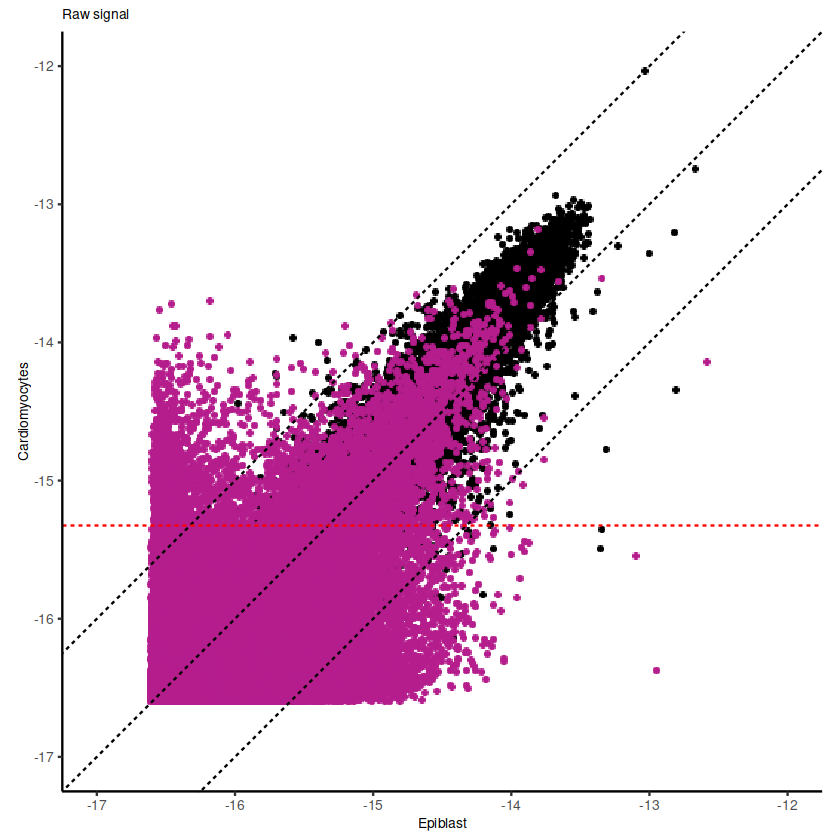

In [ ]:
set_plot_size(7, 7)
p_raw <- plot_type_egc_scatter(mcatac, "Cardiomyocytes", plot_const_line = TRUE, plot_ablines = TRUE, pointsize = 3, use_theme = FALSE, const_line_value = log2(prob1_thresh + 1e-5))
# tgppt::plot_gg_ppt(p_raw, here("figures/epiblast_vs_cardio_raw.pptx"), width = 5, height = 5, rasterize_plot = TRUE, overwrite = TRUE)
p_raw + ggtitle("Raw signal")


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_scattermore()`).”


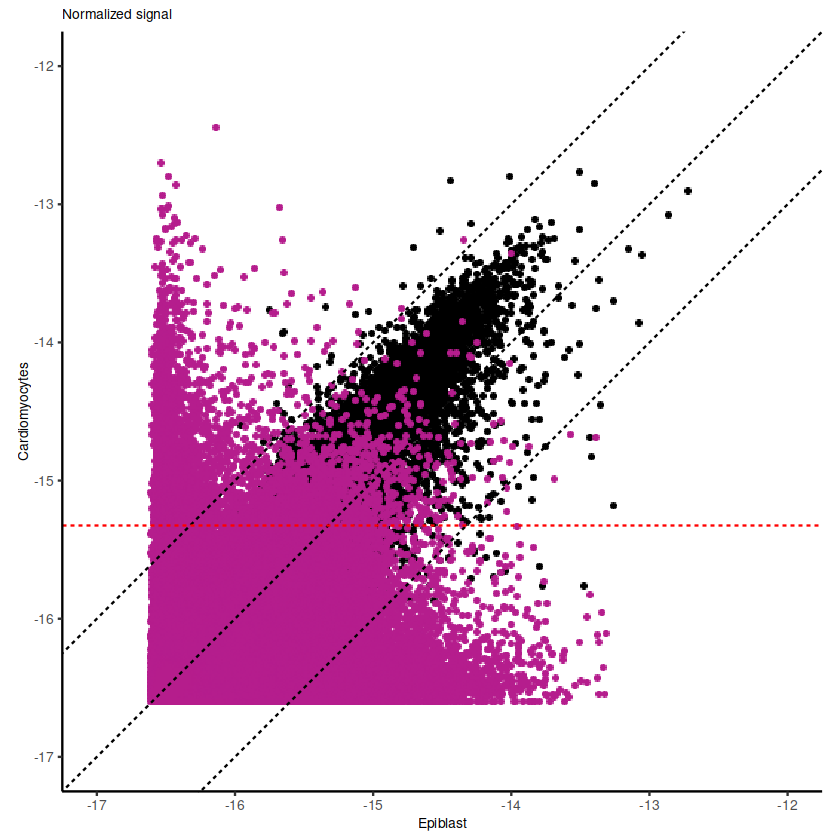

In [ ]:
set_plot_size(7, 7)
p_norm1 <- plot_type_egc_scatter(mcatac_norm, "Cardiomyocytes", plot_const_line = TRUE, plot_ablines = TRUE, pointsize = 3, use_theme = FALSE, const_line_value = log2(prob1_thresh + 1e-5))
p_norm1 + ggtitle("Normalized signal")

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


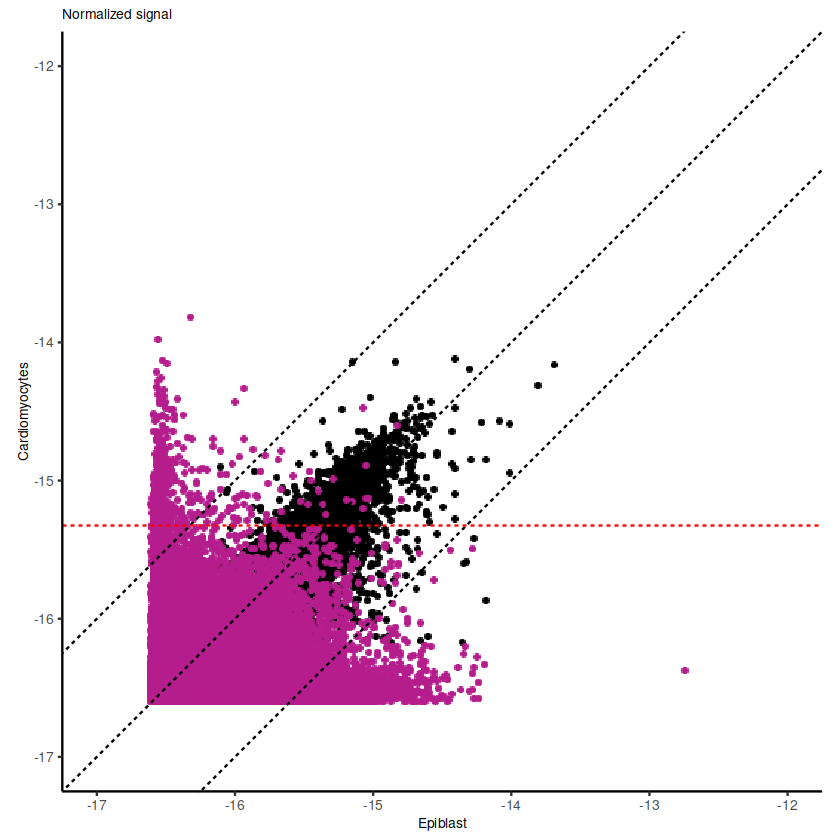

In [ ]:
set_plot_size(7, 7)
p_norm2 <- plot_type_egc_scatter(mcatac_norm_const, "Cardiomyocytes", plot_const_line = TRUE, plot_ablines = TRUE, pointsize = 3, use_theme = FALSE, const_line_value = log2(prob1_thresh + 1e-5))
# tgppt::plot_gg_ppt(p_norm2, here("figures/epiblast_vs_cardio_norm2.pptx"), width = 5, height = 5, rasterize_plot = TRUE, overwrite = TRUE)
p_norm2 + ggtitle("Normalized signal")

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_scattermore()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_scattermore()`).”


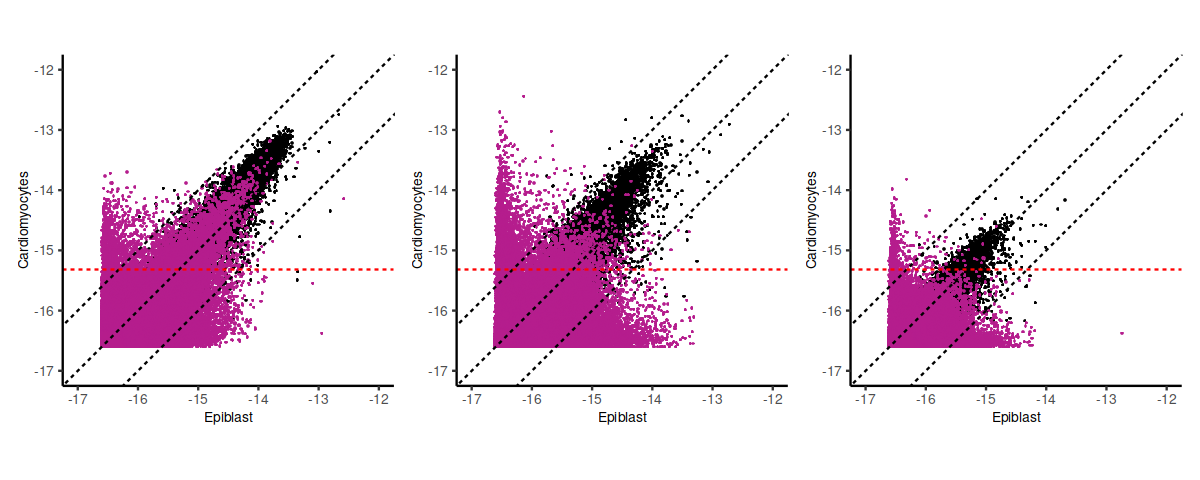

In [ ]:
set_plot_size(10, 4)
p_norm <- p_raw + p_norm1 + p_norm2
# tgppt::plot_gg_ppt(p_norm, here("figures/epiblast_vs_cardio_norm_all.pptx"), width = 15, height = 5, rasterize_plot = TRUE, overwrite = TRUE)
p_norm

### Plot the rest of the cell types 

In [ ]:
cts <- c(
    "Early nascent mesoderm", "Caudal neural plate", "Visceral endoderm",
    "Cardiomyocytes", "Late nascent mesoderm", "Rostral neural plate",
    "Endothelial cells", "Node/Notochord", "Somitic mesoderm", "Neural crest",
    "Erythroid 1", "ExE mesoderm", "Caudal epiblast", "Gut", "Erythroid 3",
    "Amnion/Chorion progenitor"
)

In [ ]:
log2(prob1_thresh + 1e-5)

80% 
-15.32388

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_scattermore()`).”
Warning message:
“Removed 17 rows containing missing values or values outside the scale range
(`geom_scattermore()`).”


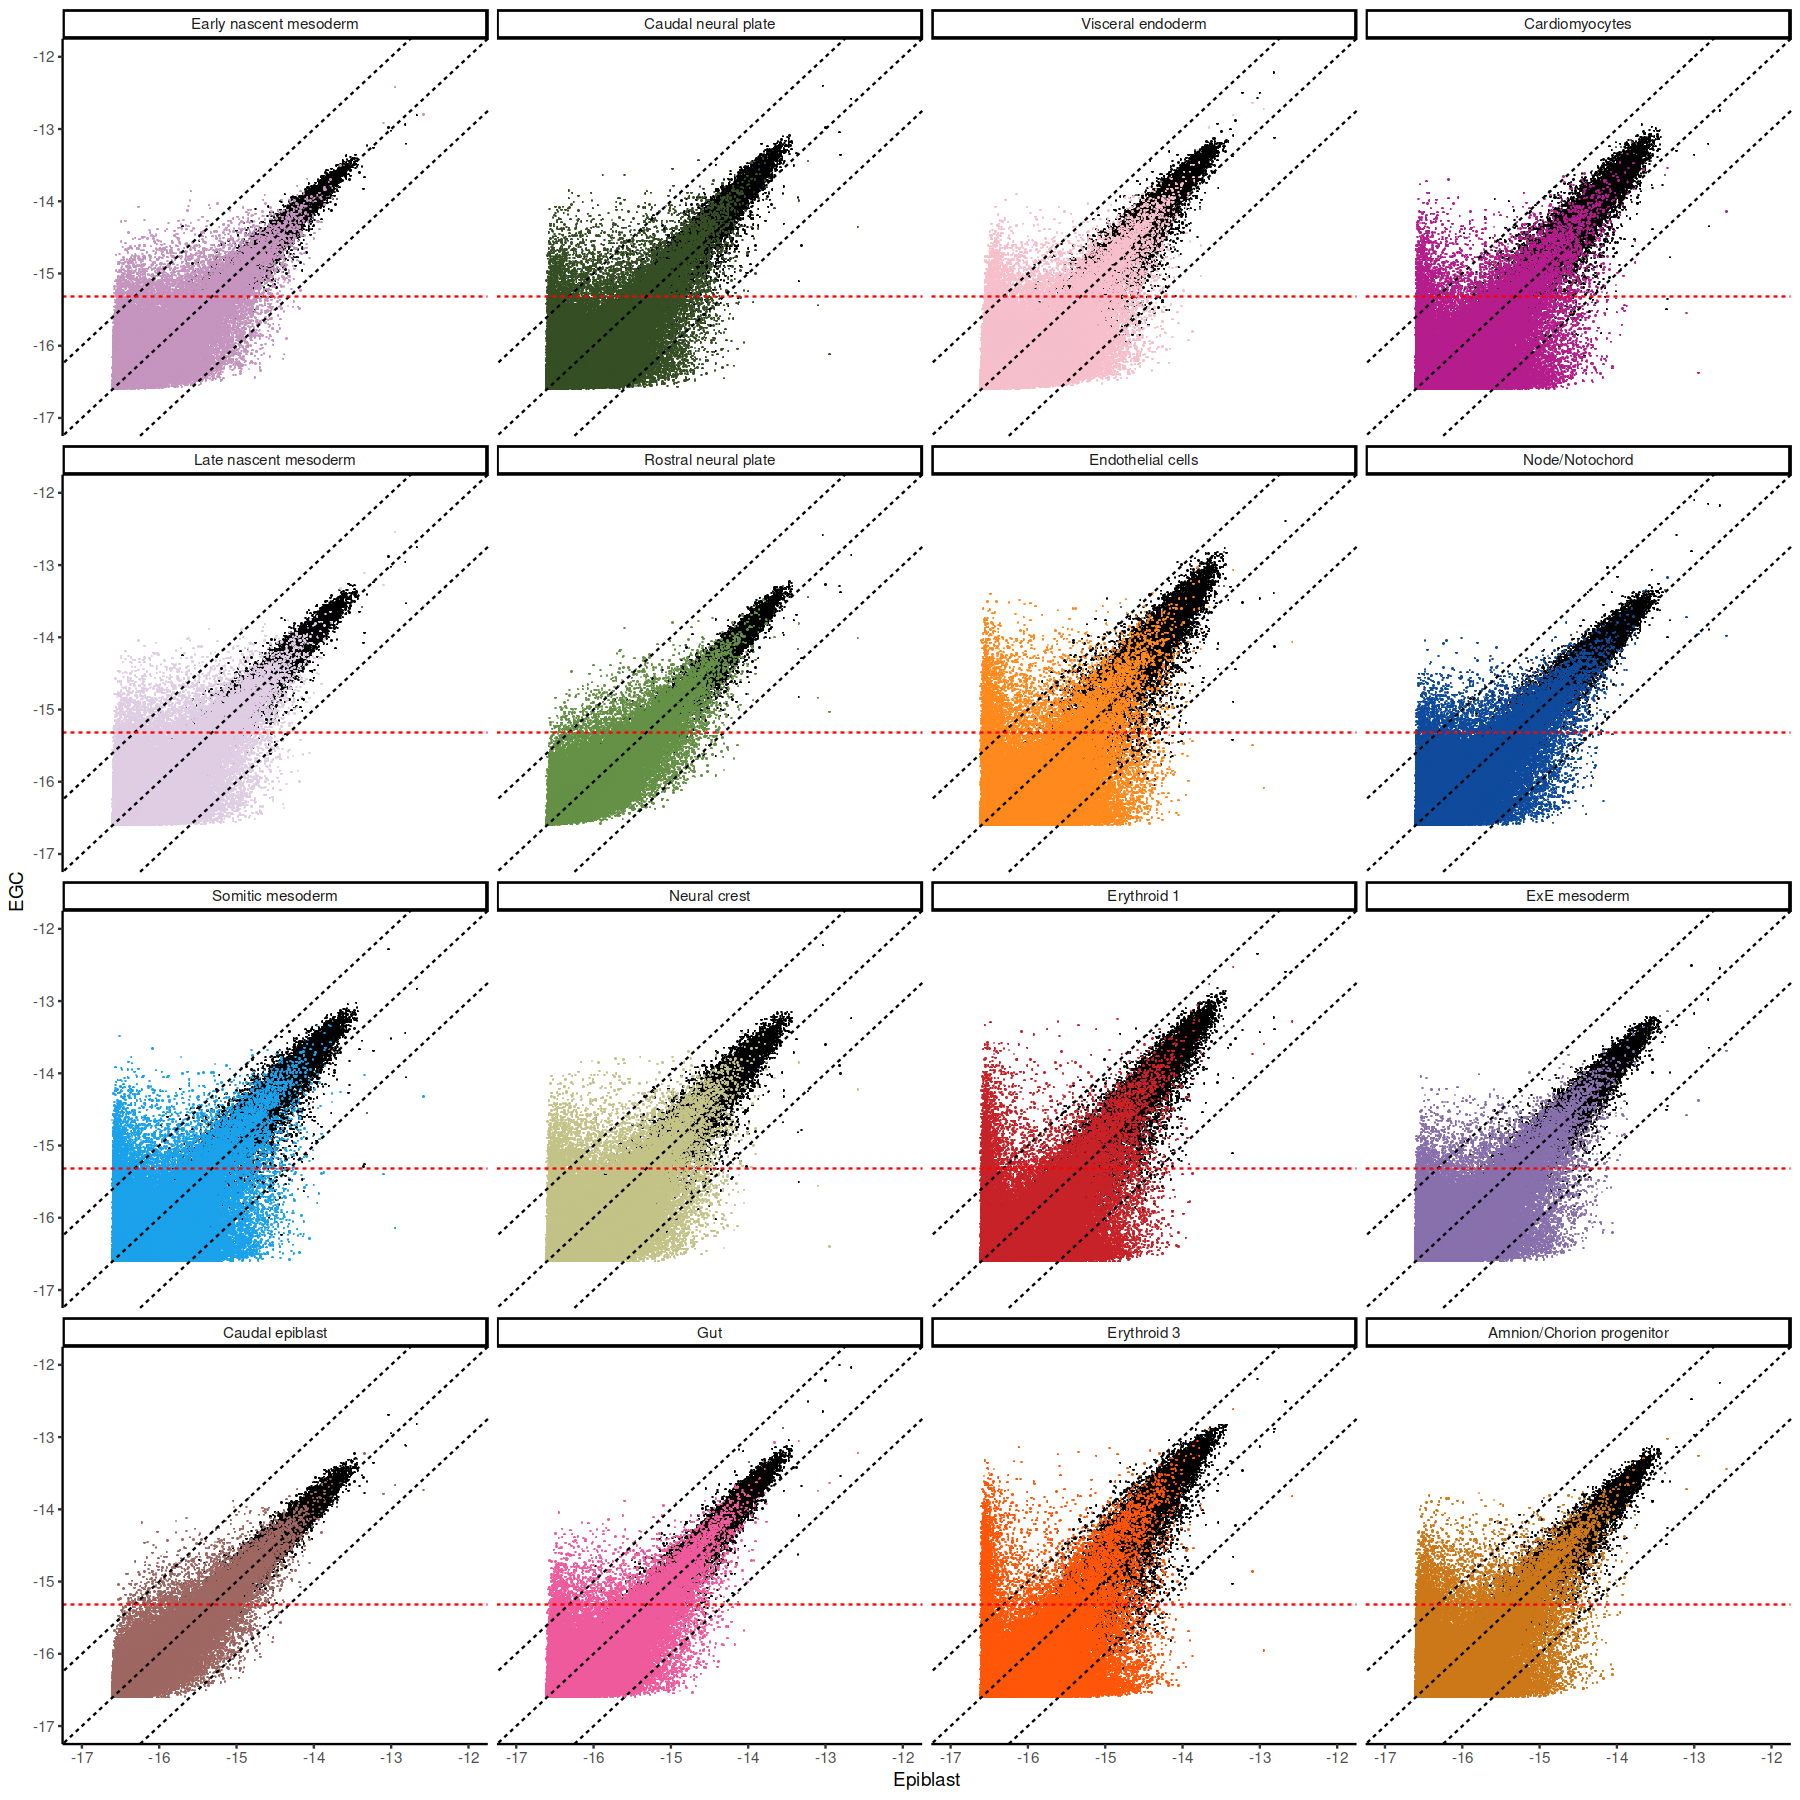

In [ ]:
set_plot_size(15, 15)
p_raw_all <- plot_type_egc_scatter(mcatac, cts, const_line_value = log2(prob1_thresh + 1e-5), plot_const_line = TRUE)
p_raw_all + guides(color = "none")

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_scattermore()`).”
Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_scattermore()`).”


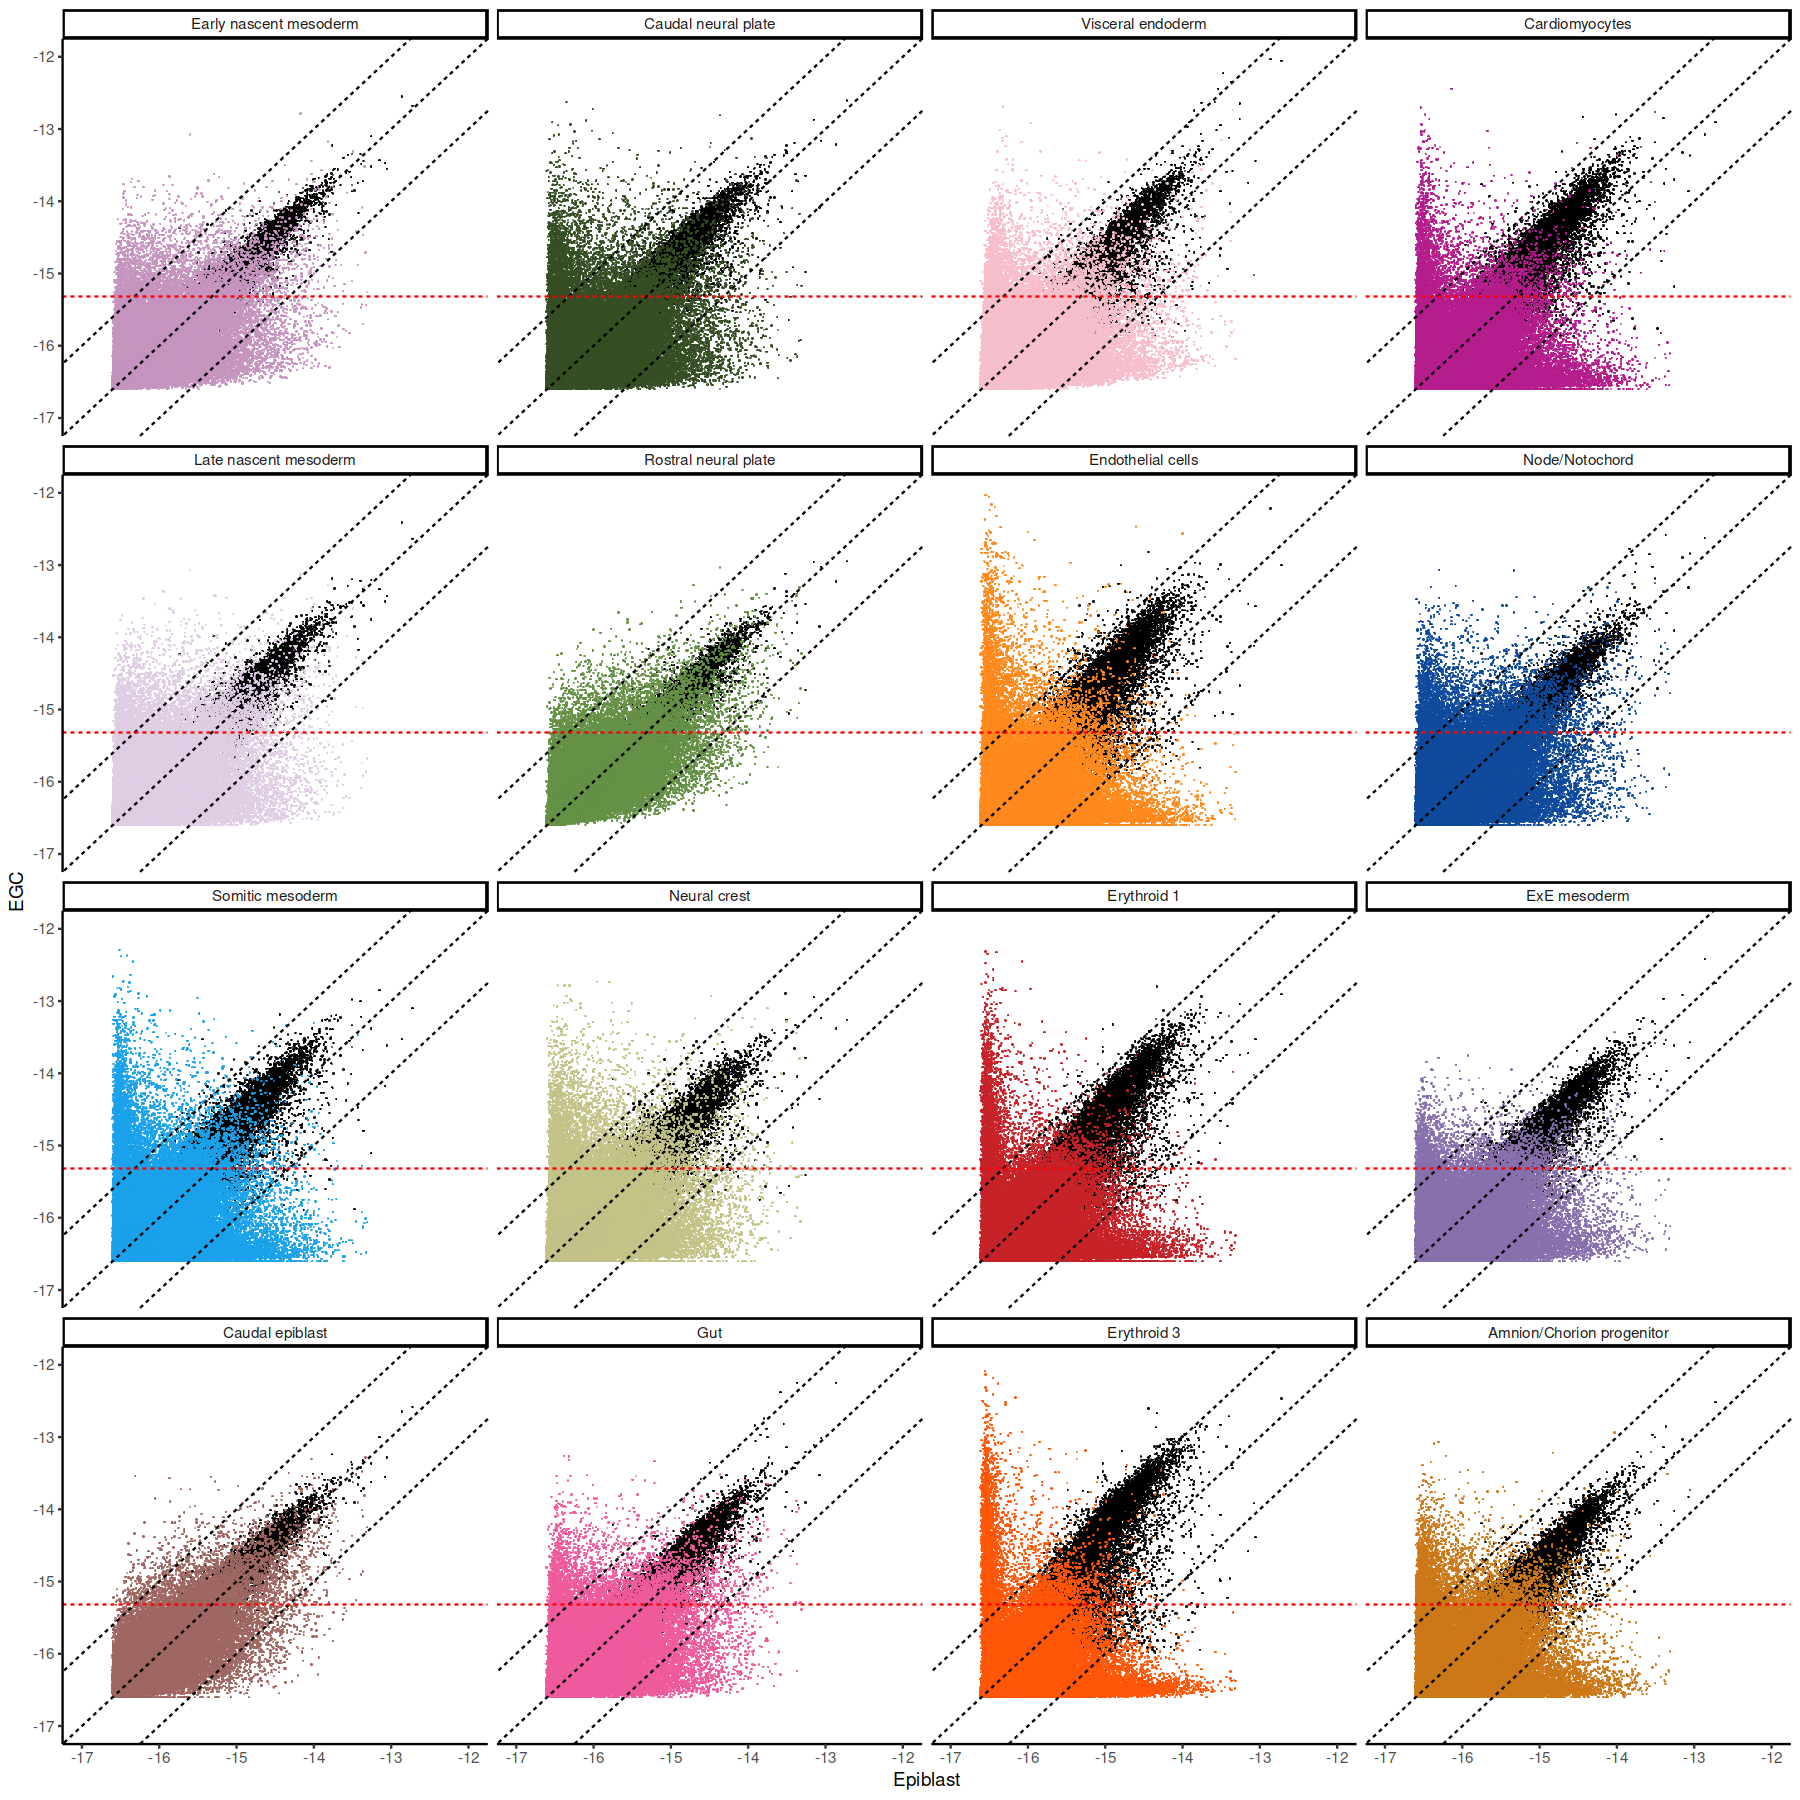

In [ ]:
set_plot_size(15, 15)
p_norm1_all <- plot_type_egc_scatter(mcatac_norm, cts, const_line_value = log2(prob1_thresh + 1e-5), plot_const_line = TRUE)
p_norm1_all + guides(color = "none")

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


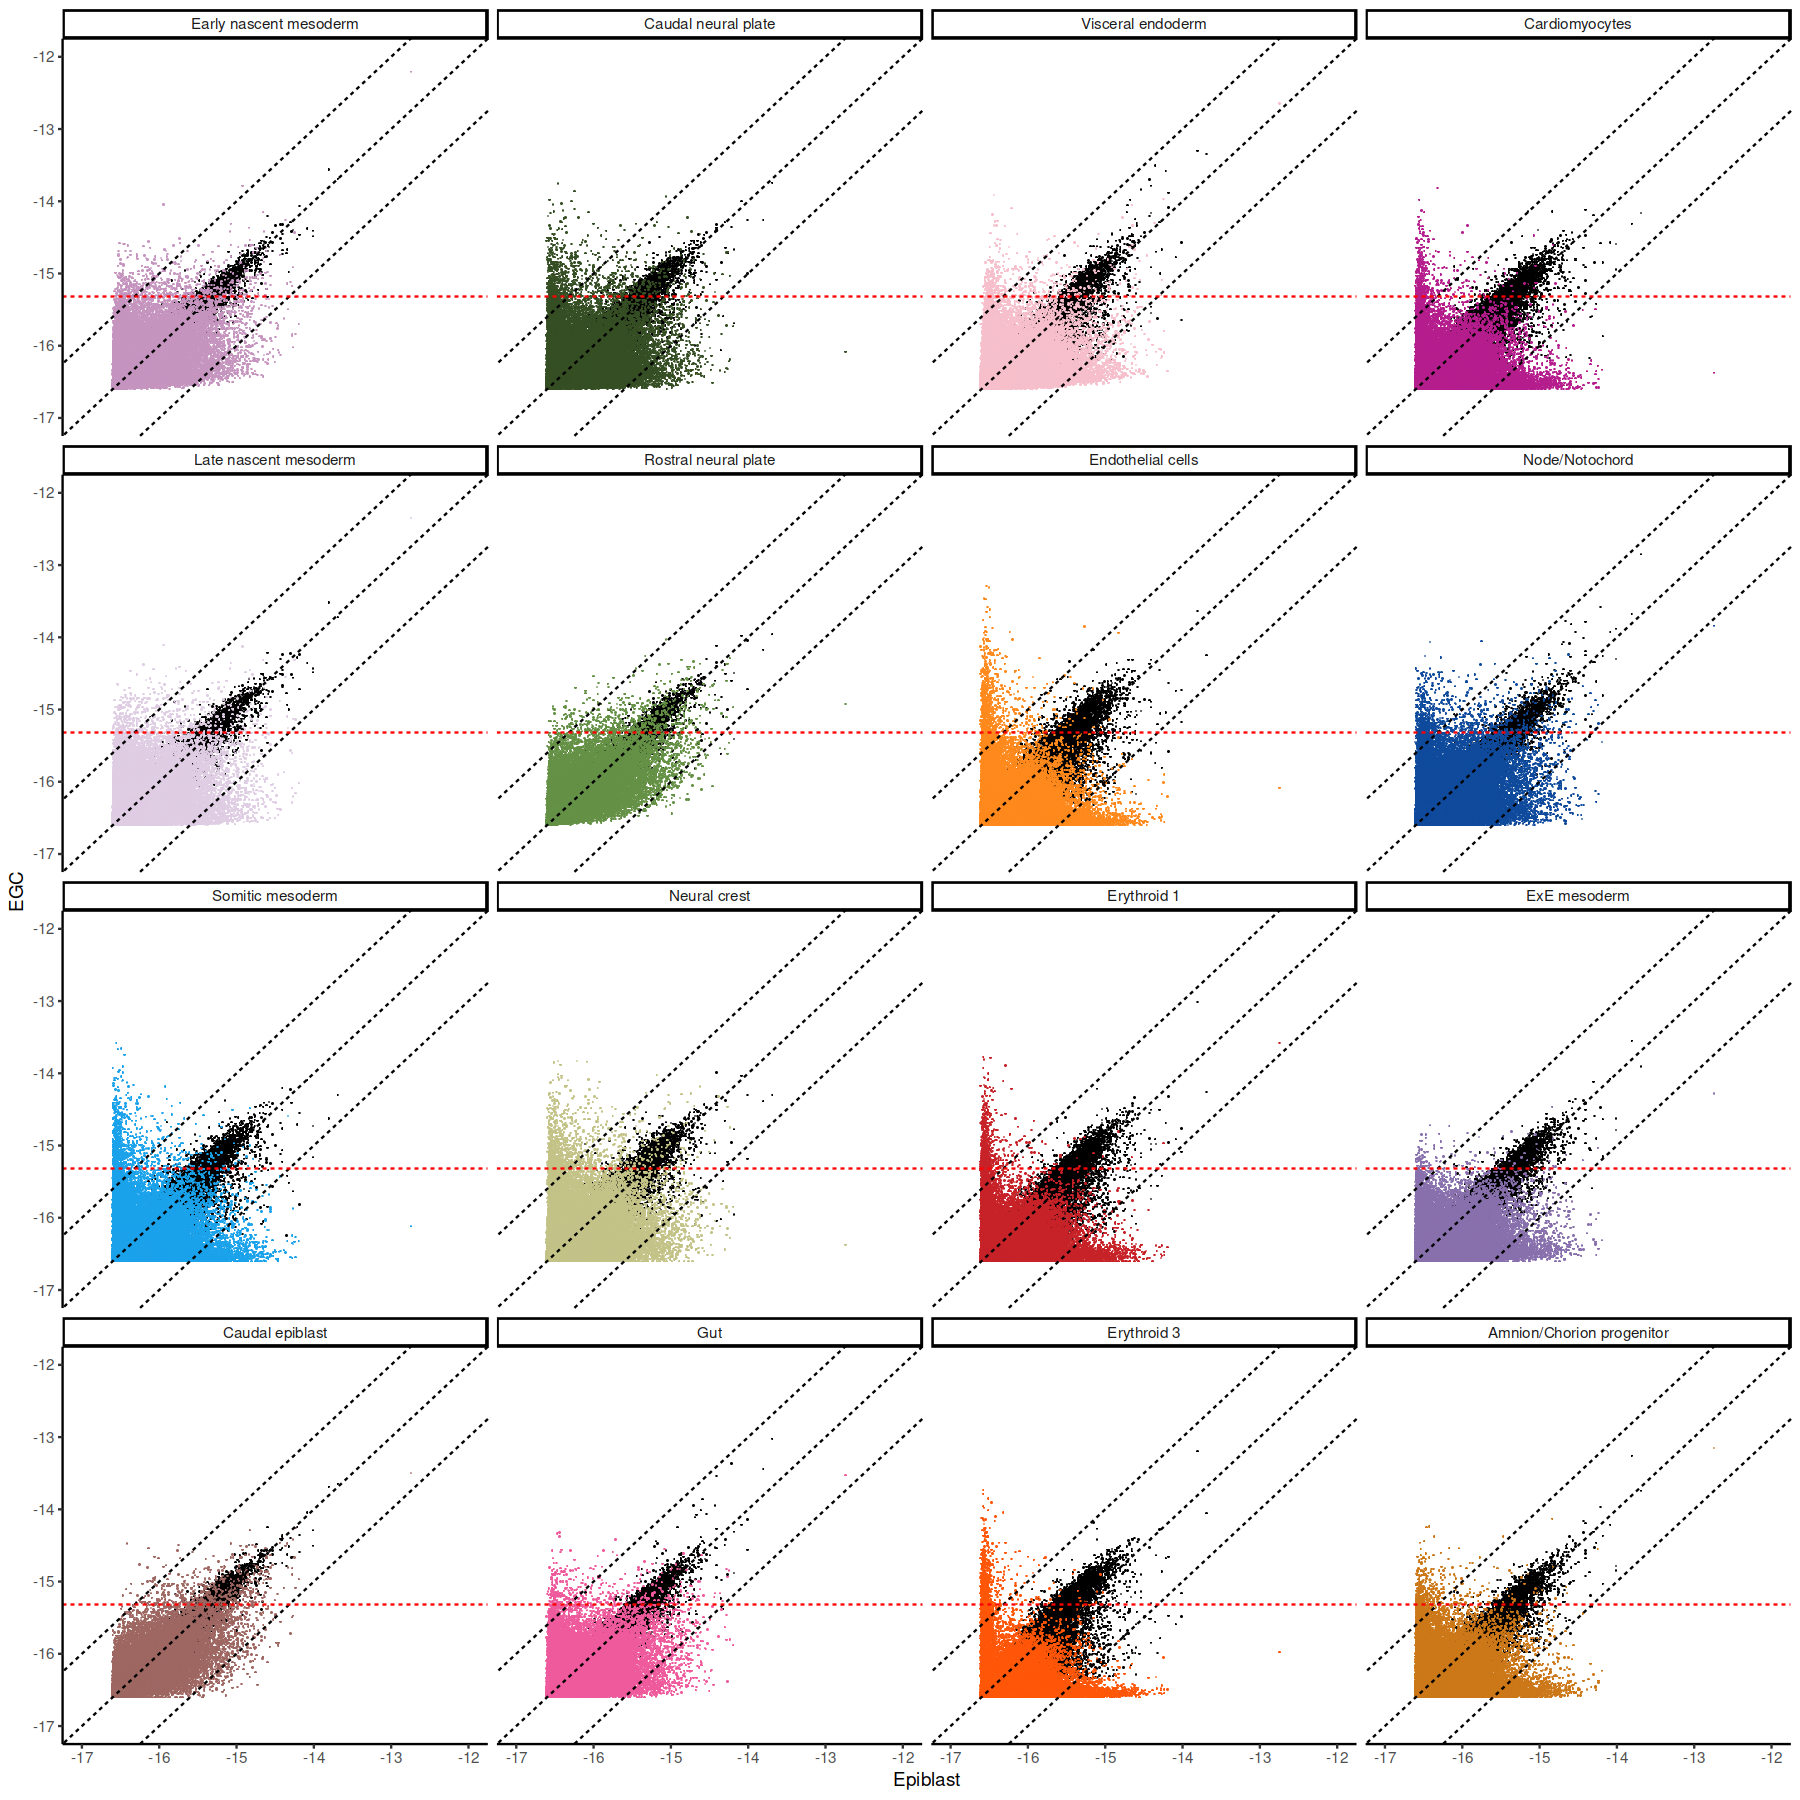

In [ ]:
set_plot_size(15, 15)
p_norm2_all <- plot_type_egc_scatter(mcatac_norm_const, cts, const_line_value = log2(prob1_thresh + 1e-5), plot_const_line = TRUE)
p_norm2_all + guides(color = "none")

## Transform to probabilities 

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


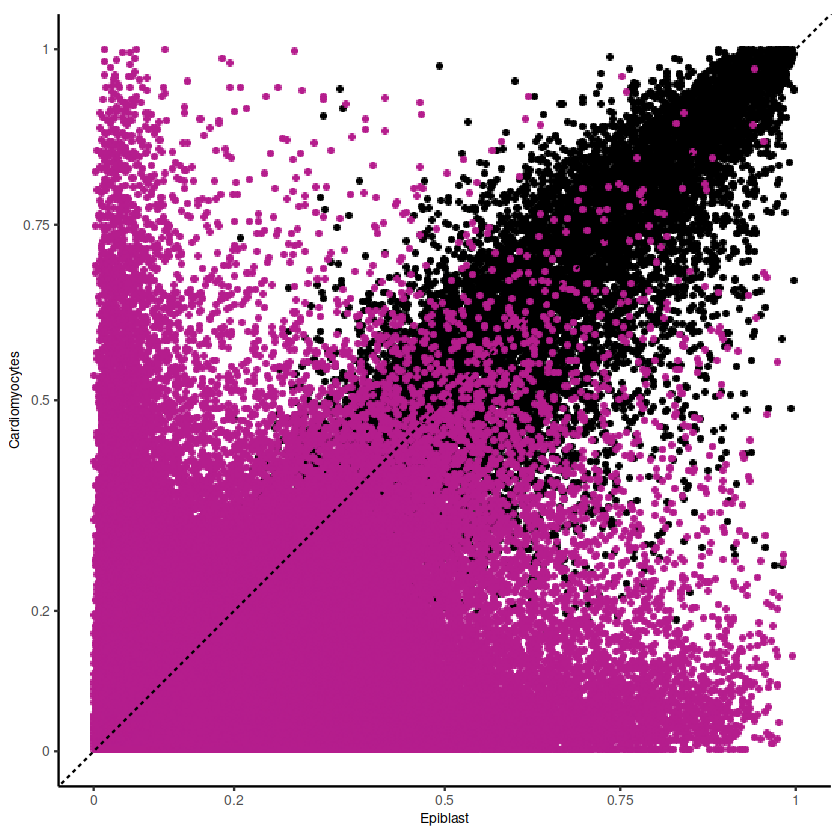

In [ ]:
set_plot_size(7, 7)
p_prob <- plot_type_egc_scatter(mcatac_norm_const_prob, "Cardiomyocytes", pointsize = 3, use_theme = FALSE, limits = NULL, log_transform = FALSE, plot_ablines = FALSE) +
    scale_y_continuous(breaks = c(0, 0.2, 0.5, 0.75, 1), labels = c("0", "0.2", "0.5", "0.75", "1"), limits = c(0, 1)) +
    scale_x_continuous(breaks = c(0, 0.2, 0.5, 0.75, 1), labels = c("0", "0.2", "0.5", "0.75", "1"), limits = c(0, 1))
# tgppt::plot_gg_ppt(p_prob, here("figures/epiblast_vs_cardio_prob.pptx"), width = 5, height = 5, rasterize_plot = TRUE, overwrite = TRUE)
p_prob 

### Figure 1B
Top panel

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_scattermore()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_scattermore()`).”


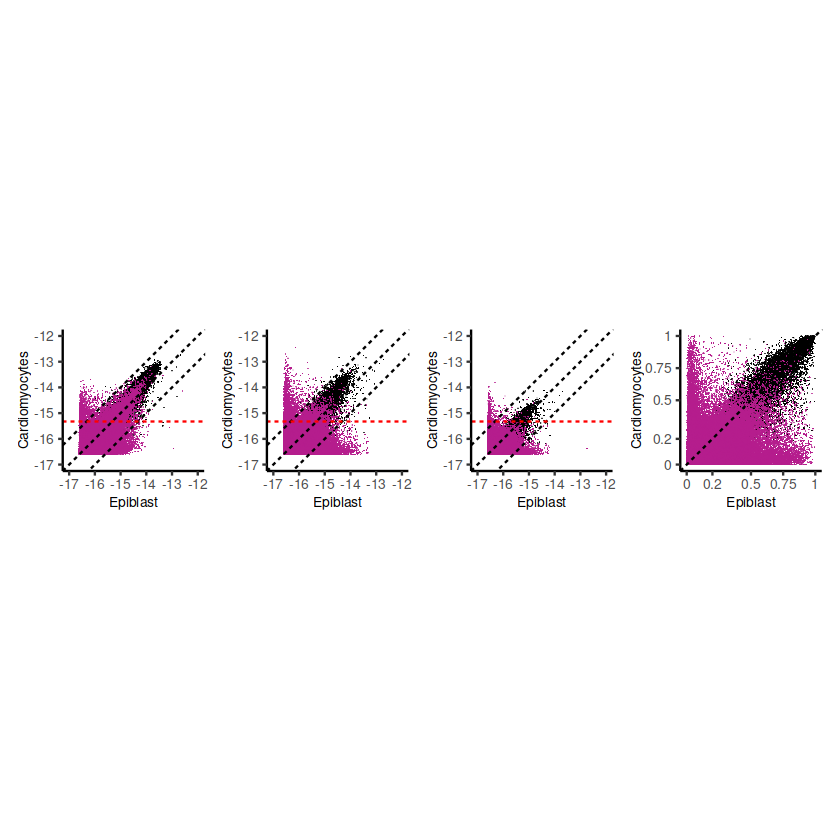

In [ ]:
p_norm_all <- patchwork::wrap_plots(list(p_raw, p_norm1, p_norm2, p_prob), nrow = 1)
# tgppt::plot_gg_ppt(p_norm_all, here("figures/epiblast_vs_cardio_norm_all_with_prob.pptx"), width = 15, height = 5, rasterize_plot = FALSE, overwrite = TRUE)
p_norm_all

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


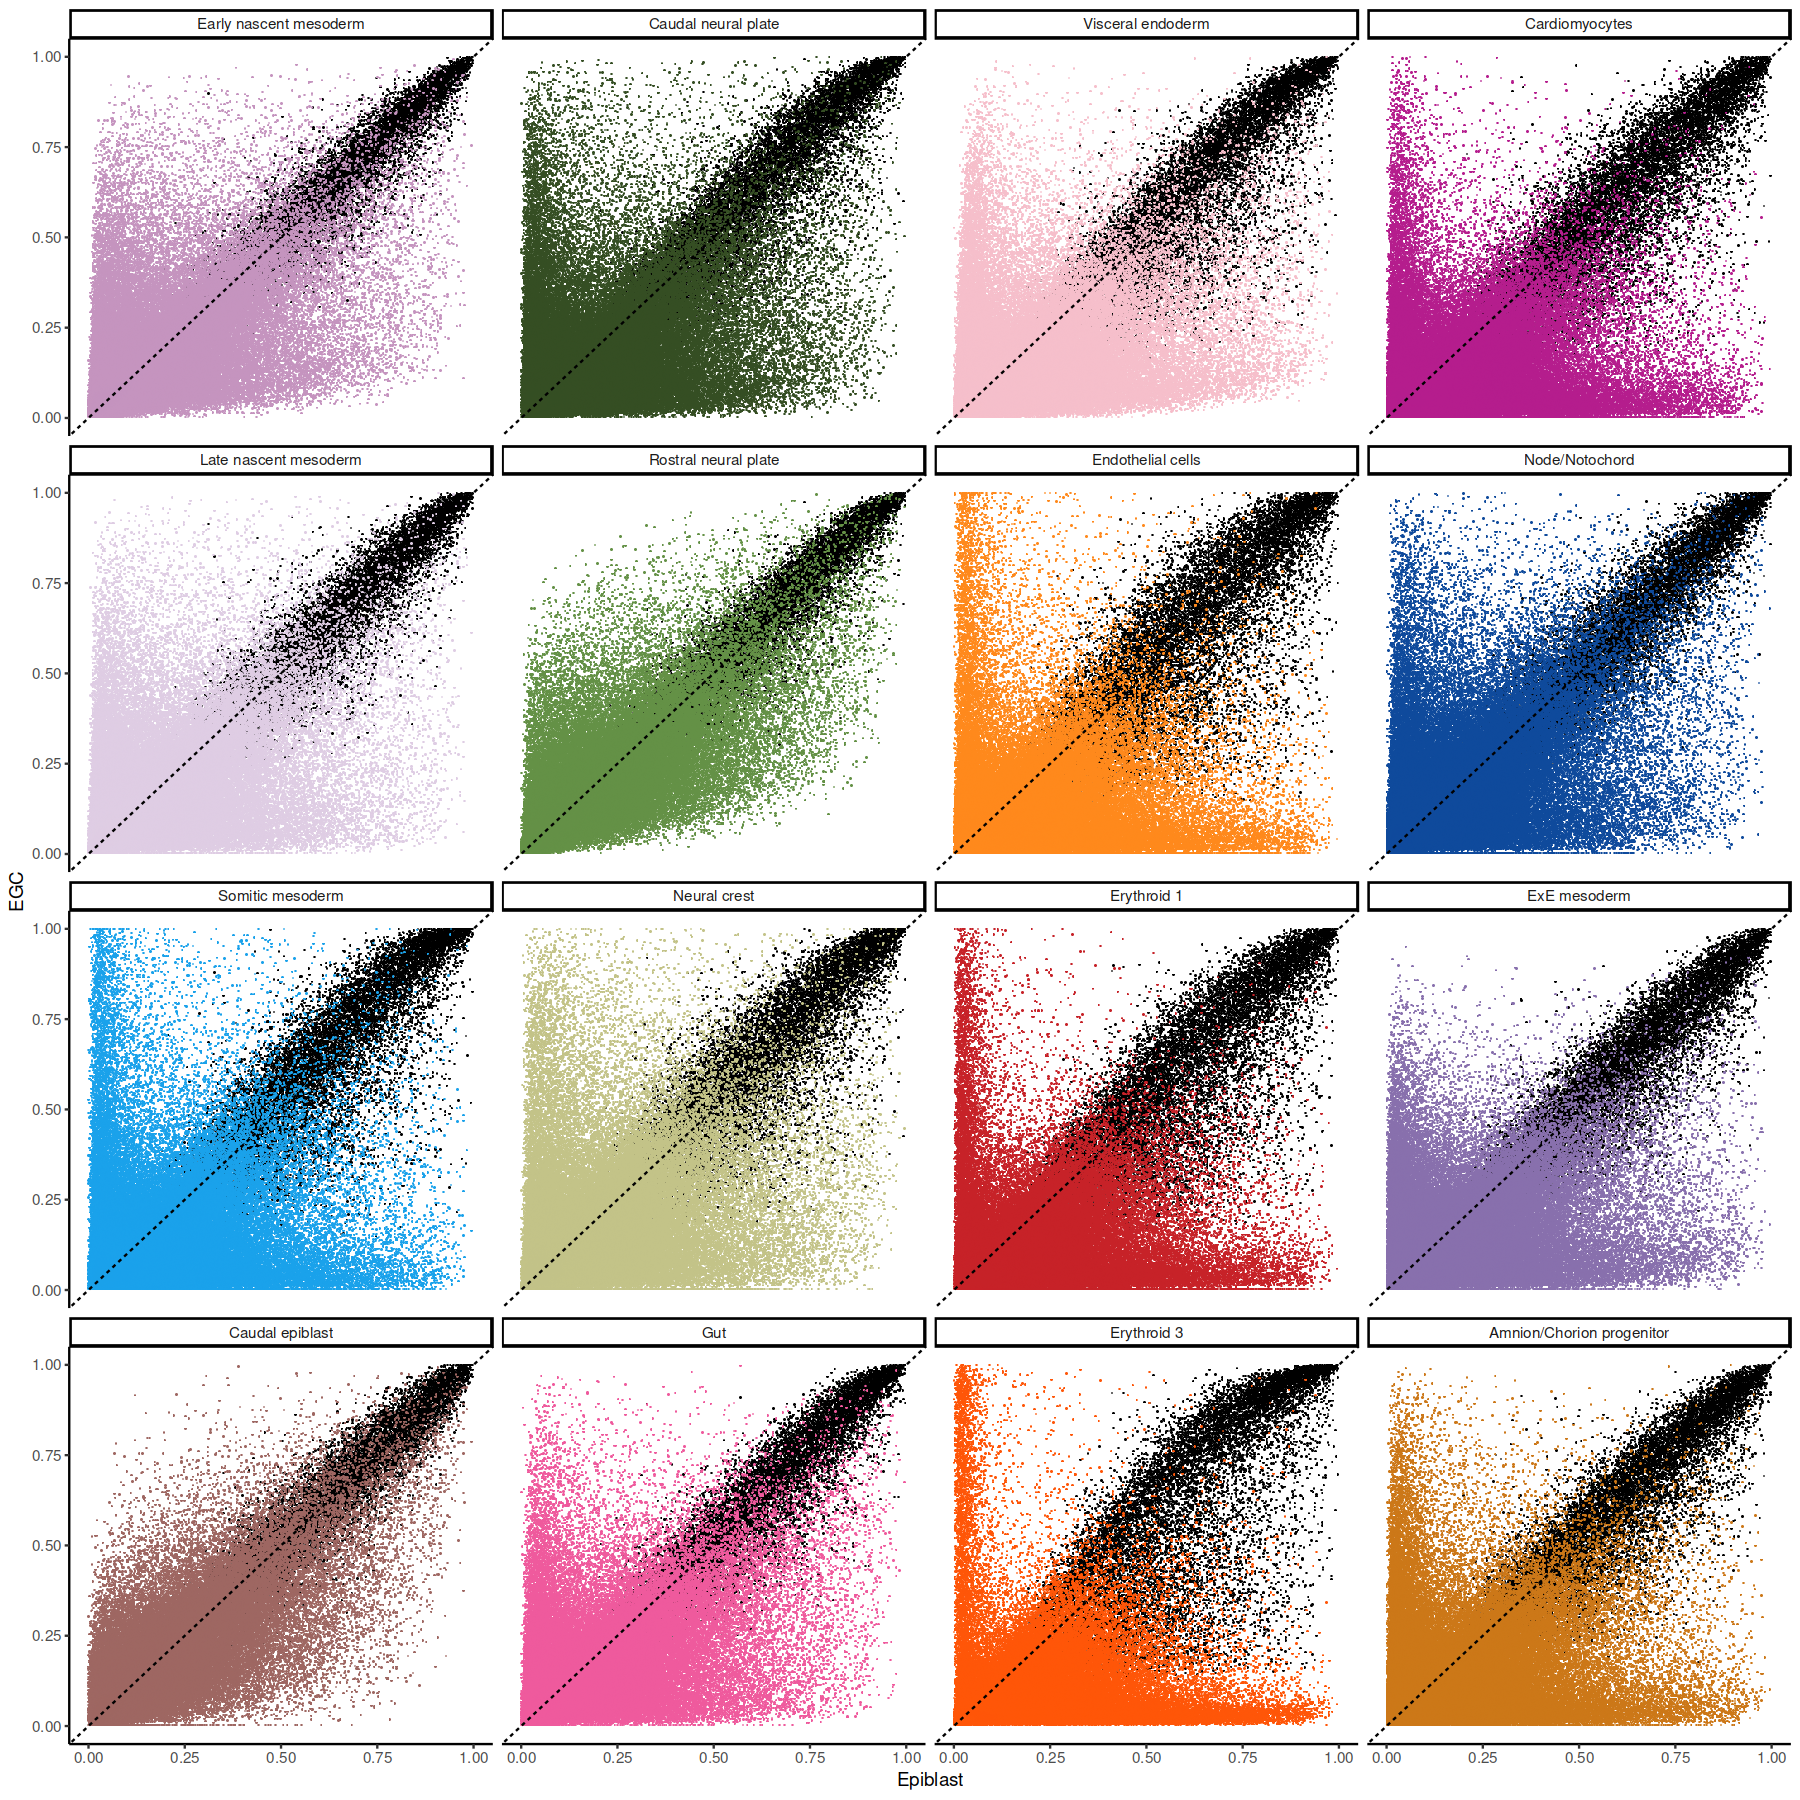

In [ ]:
set_plot_size(15, 15)
p_prob_all <- plot_type_egc_scatter(mcatac_norm_const_prob, cts, limits = NULL, log_transform = FALSE, plot_ablines = FALSE)
p_prob_all + guides(color = "none")

In [ ]:
ct_egc <- t(tgs_matrix_tapply(mcatac_norm_const_prob@egc, mcatac_norm_const_prob@metadata$cell_type, mean, na.rm = TRUE))

ct_df <- ct_egc %>%
    as.data.frame() %>%
    rownames_to_column("cre")

### Figure 1C
Top panel

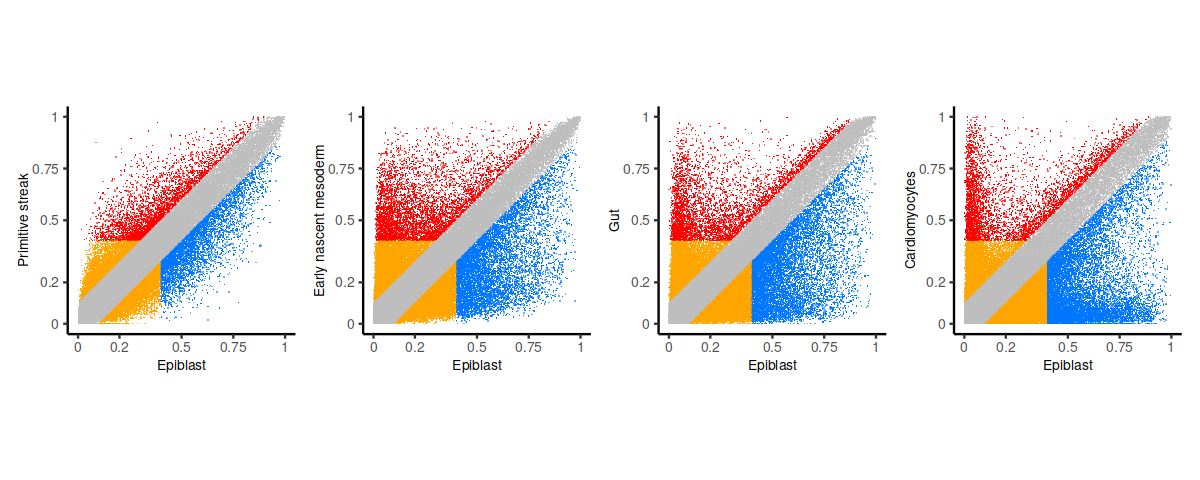

In [ ]:
set_plot_size(10, 4)
prob_cts <- c("Primitive streak", "Early nascent mesoderm", "Gut", "Cardiomyocytes")
p_prob_colored <- purrr::map(prob_cts, ~ plot_prob_cell_type_scatter(ct_egc, "Epiblast", .x)) %>%
    patchwork::wrap_plots(nrow = 1)

# tgppt::plot_gg_ppt(p_prob_colored, here("figures/epiblast_vs_cts_prob_colored.pptx"), width = 15, height = 5, rasterize_plot = FALSE, overwrite = TRUE)
p_prob_colored



## Plot only for the traj cell types 

In [ ]:
traj_cell_types <- list(
    meso = c("Epiblast", "Primitive streak", "Early nascent mesoderm"),
    card = c("Early nascent mesoderm", "Late nascent mesoderm", "Cardiopharyngeal mesoderm", "Cardiomyocytes"),
    exe = c("Early nascent mesoderm", "ExE mesoderm"),
    caud = c("Early nascent mesoderm", "Late nascent mesoderm", "Caudal mesoderm"),
    cnp = c("Epiblast", "Definitive ectoderm", "Caudal neural plate"),
    ecto = c("Epiblast", "Definitive ectoderm", "Rostral neural plate"),
    ce = c("Epiblast", "Definitive ectoderm", "Caudal epiblast")
)

traj_range_cell_types <- list(
    meso =  c("Epiblast", "Early nascent mesoderm"),
    endo =  c("Epiblast", "Gut"),
    ecto =  c("Epiblast", "Rostral neural plate"),
    exe =  c("Early nascent mesoderm", "ExE mesoderm"),
    caud = c("Early nascent mesoderm", "Caudal mesoderm"),
    card = c("Early nascent mesoderm", "Cardiomyocytes")
)

### Figure S2A
Top panel

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


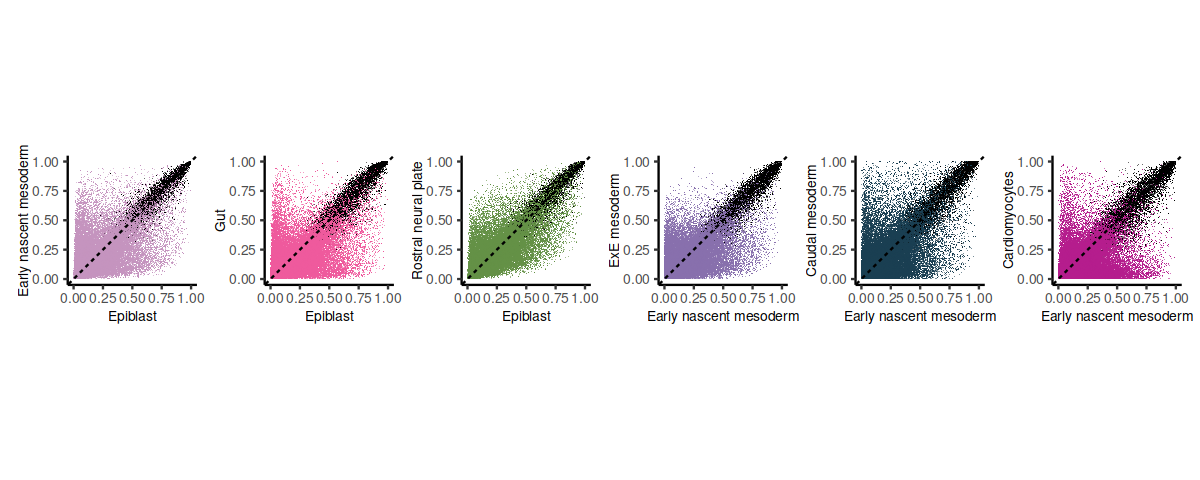

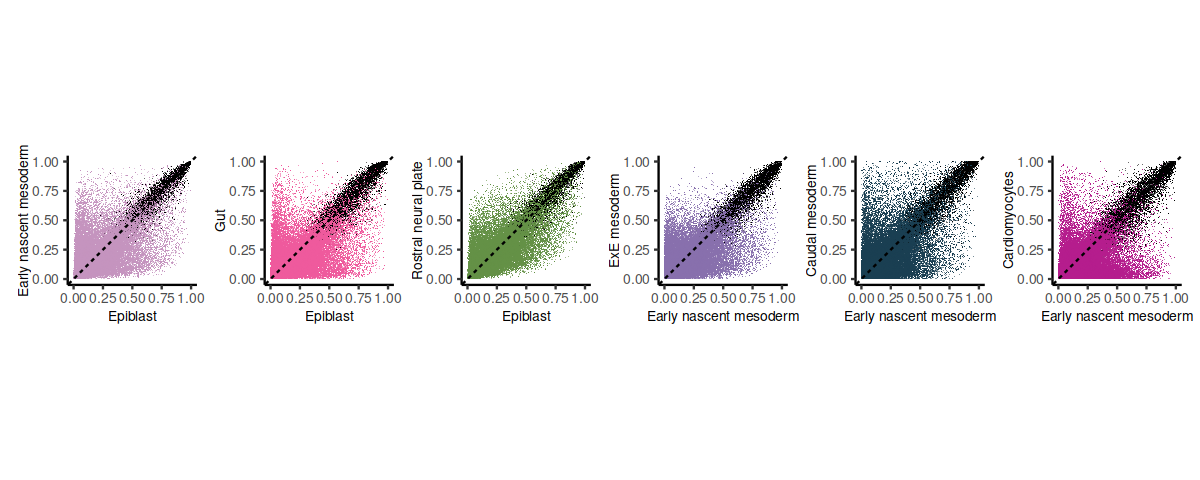

In [ ]:
set_plot_size(10, 4)
plots <- purrr::map(traj_range_cell_types, ~
    plot_type_egc_scatter(mcatac_norm_const_prob, .x[2], limits = NULL, log_transform = FALSE, plot_ablines = FALSE, base_type = .x[1]) + theme(aspect.ratio = 1) + guides(color = "none"))

p_traj <- patchwork::wrap_plots(plots, nrow = 1) & theme_arial_classic() & theme(legend.position = "none") & theme(aspect.ratio = 1)
p_traj

# tgppt::plot_gg_ppt(p_traj, here("figures/traj_egc_scatters_ap.pptx"), width = 25, height = 7, rasterize_plot = FALSE, overwrite = TRUE)
p_traj

## Plot regional score 

In [ ]:
traj_data <- readr::read_rds(here("data/gastrulation_peaks.rds"))

Below are a heavy computations, uncomment to run or instead of loading the results from the file.

In [ ]:
# gseq.create_track("[GC]", "seq.G_or_C")
# gvtrack.create("gc_cont", "seq.G_or_C", "sum")
# gvtrack.create("gc_cont_20k", "seq.G_or_C", "sum")
# gvtrack.iterator("gc_cont_20k", sshift = -1e4, eshift = 1e4)
# gc_cont_df <- gextract(c("gc_cont", "gc_cont_20k"), intervals = traj_data %>% filter(const), iterator = traj_data %>% filter(const), colnames = c("gc_cont", "gc_cont_20k")) %>%
#     mutate(gc_cont_20k = gc_cont_20k - gc_cont) %>%
#     mutate(gc_cont = gc_cont / 300) %>%
#     mutate(gc_cont_20k = gc_cont_20k / 2e4) %>%
#     as_tibble() %cache_df% here("data/const_gc_cont.tsv")

In [ ]:
gc_cont_df <- fread(here("data/const_gc_cont.tsv"))
gc_cont_df <- gc_cont_df %>%
    left_join(traj_data %>% filter(const) %>% select(chrom, start, end, marginal_20k, marginal), by = c("chrom", "start", "end"))
head(gc_cont_df)

chrom start   end     gc_cont   gc_cont_20k intervalID marginal_20k marginal
1 chr1  4571640 4571940 0.7233333 0.40230     1          40117        18445   
2 chr1  4785560 4785860 0.6566667 0.39850     2          43953        20175   
3 chr1  4807640 4807940 0.7333333 0.41495     3          81146        29315   
4 chr1  4857620 4857920 0.6633333 0.40890     4          89864        34043   
5 chr1  5082920 5083220 0.5933333 0.40060     5          42430        16030   
6 chr1  5588220 5588520 0.6233333 0.40670     6          22825        11415

In [ ]:
# gc_cont_df_all <- gextract(c("gc_cont", "gc_cont_20k"), intervals = traj_data, iterator = traj_data, colnames = c("gc_cont", "gc_cont_20k")) %>%
#     mutate(gc_cont_20k = gc_cont_20k - gc_cont) %>%
#     mutate(gc_cont = gc_cont / 300) %>%
#     mutate(gc_cont_20k = gc_cont_20k / 2e4) %>%
#     as_tibble() %cache_df% here("data/gc_cont.tsv")

In [ ]:
gc_cont_df_all <- fread(here("data/gc_cont.tsv"))
gc_cont_df_all <- gc_cont_df_all %>%
    left_join(traj_data %>% select(chrom, start, end, marginal_20k, marginal), by = c("chrom", "start", "end"))
head(gc_cont_df_all)

chrom start   end     gc_cont   gc_cont_20k intervalID marginal_20k marginal
1 chr1  3003620 3003920 0.6033333 0.23365     1           4151         207    
2 chr1  3008880 3009180 0.5066667 0.33550     2           4666         295    
3 chr1  3035780 3036080 0.4466667 0.40405     3           6774        1114    
4 chr1  3062880 3063180 0.4466667 0.38825     4           7934        1356    
5 chr1  3191760 3192060 0.4166667 0.38285     5          11153        2113    
6 chr1  3264000 3264300 0.4900000 0.37690     6           5755         336

### Figure S2B

[1] 0.62

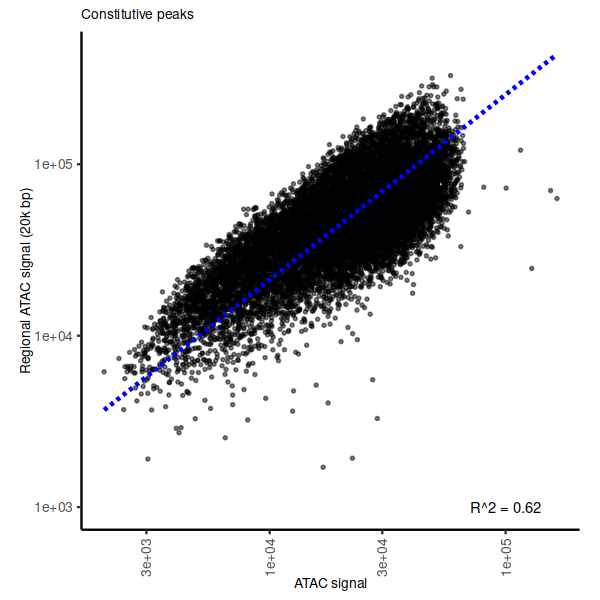

In [ ]:
set_plot_size(5, 5)
r2 <- cor(traj_data$marginal[traj_data$const], traj_data$marginal_20k[traj_data$const])^2
round(r2, digits = 2)
p_reg <- traj_data %>%
    filter(const) %>%
    ggplot(aes(x = marginal, y = marginal_20k - marginal)) +
    # scattermore::geom_scattermore() +
    geom_point(size = 0.5, alpha = 0.5) +
    scale_x_log10(label = scales::scientific_format()) +
    scale_y_log10(label = scales::scientific_format()) +
    geom_smooth(method = "lm", formula = y ~ x + 0, se = FALSE, color = "blue", linetype = "dashed") +
    xlab("ATAC signal") +
    ylab("Regional ATAC signal (20k bp)") +
    ggtitle("Constitutive peaks") +    
    theme(aspect.ratio = 1) +    
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) 
p_reg + annotate("text", x = 1e5, y = 1e3, label = paste0("R^2 = ", round(r2, 2)), size = 3)
# tgppt::plot_gg_ppt(p_reg, here("figures/const_peaks_reg.pptx"), width = 5, height = 5, rasterize_plot = TRUE, overwrite = TRUE)

    

[1] 0.21

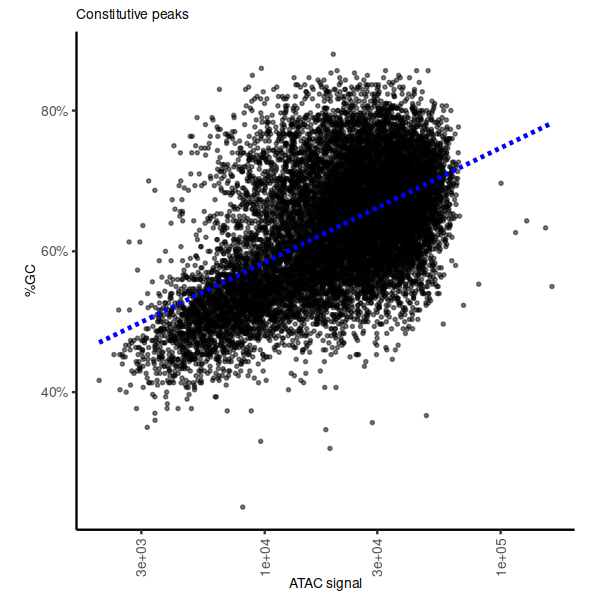

In [ ]:
r2 <- cor(gc_cont_df$marginal, gc_cont_df$gc_cont)^2
round(r2, digits = 2)
p_gc <- gc_cont_df %>%
    ggplot(aes(x = marginal, y = gc_cont)) +
    geom_point(size = 0.5, alpha = 0.5) +
    geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "blue", linetype = "dashed") +
    scale_x_log10(label = scales::scientific_format()) +
    scale_y_continuous(label = scales::percent) + 
    xlab("ATAC signal") +
    ylab("%GC") +
    ggtitle("Constitutive peaks") +
    theme(aspect.ratio = 1) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
# tgppt::plot_gg_ppt(p_gc, here("figures/const_peaks_reg.pptx"), width = 5, height = 5, rasterize_plot = TRUE, overwrite = FALSE, left = 15)
p_gc 

[1] 0.37

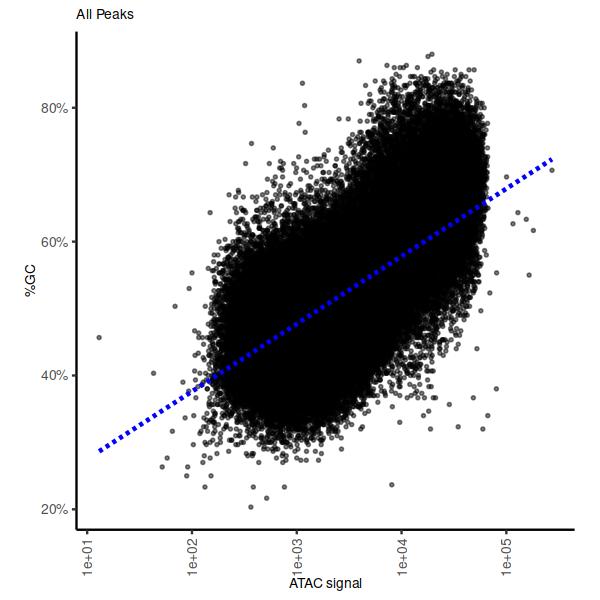

In [ ]:
r2 <- cor(gc_cont_df_all$marginal, gc_cont_df_all$gc_cont)^2
round(r2, digits = 2)
p_gc <- gc_cont_df_all %>%
    ggplot(aes(x = marginal, y = gc_cont)) +
    geom_point(size = 0.5, alpha = 0.5) +
    geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "blue", linetype = "dashed") +
    scale_x_log10(label = scales::scientific_format()) +
    scale_y_continuous(label = scales::percent) + 
    xlab("ATAC signal") +
    ylab("%GC") +
    ggtitle("All Peaks") +
    theme(aspect.ratio = 1) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
# tgppt::plot_gg_ppt(p_gc, here("figures/peaks_reg.pptx"), width = 5, height = 5, rasterize_plot = TRUE, overwrite = TRUE, left = 15)
p_gc

## Fraction of constitutive

In [ ]:
mc_egc <- as.matrix(mcatac_norm_const_prob@egc)
ct_egc <- t(tgs_matrix_tapply(mc_egc, mcatac@metadata$cell_type, mean, na.rm = TRUE))

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


### Figure S2C

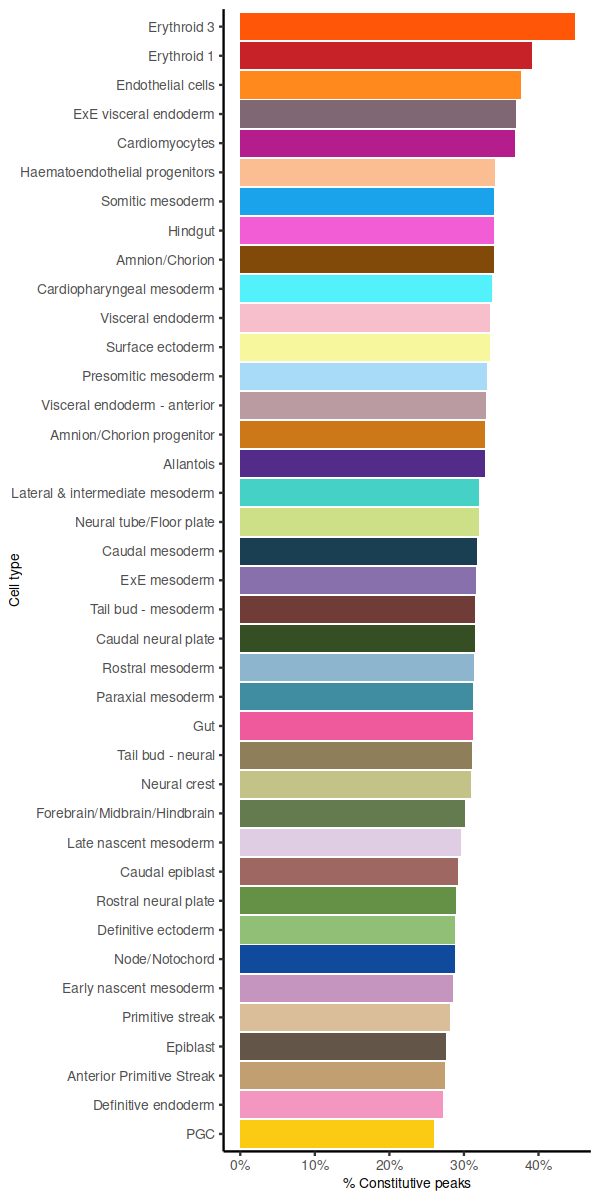

In [ ]:
set_plot_size(5, 10)
p_const_df <- plyr::ldply(colnames(ct_egc), function(x) tibble(n_const = sum(ct_egc[mcatac_norm_const_prob@peaks$const, x]), n = sum(ct_egc[, x]), cell_type = x)) %>%
    mutate(p = n_const / n) %>%
    arrange(p)
cts_colors <- mcatac_norm_const_prob@metadata %>%
    select(cell_type, cell_type_color) %>%
    distinct() %>%
    deframe()
p_const <- p_const_df %>%
    ggplot(aes(x = reorder(cell_type, p), y = p, fill = cell_type)) +
    geom_bar(stat = "identity") +
    scale_y_continuous(labels = scales::percent) +
    xlab("Cell type") +
    ylab("% Constitutive peaks") +
    scale_fill_manual(values = cts_colors) +
    guides(fill = "none") +
    coord_flip() 
p_const

# tgppt::plot_gg_ppt(p_const, here("figures/const_peaks_by_cell_type.pptx"), width = 9, height = 10, rasterize_plot = FALSE, overwrite = TRUE)

In [ ]:
p_const_df %>%
    arrange(desc(p))

n_const  n        cell_type                       p        
1  7763.223 17334.07 Erythroid 3                     0.4478592
2  7687.574 19682.07 Erythroid 1                     0.3905876
3  7707.833 20471.05 Endothelial cells               0.3765237
4  7657.731 20706.22 ExE visceral endoderm           0.3698276
5  7705.567 20964.33 Cardiomyocytes                  0.3675561
6  7886.715 23123.96 Haematoendothelial progenitors  0.3410625
7  8058.425 23684.07 Somitic mesoderm                0.3402467
8  7842.488 23086.92 Hindgut                         0.3396940
9  7831.709 23080.25 Amnion/Chorion                  0.3393252
10 7845.609 23304.75 Cardiopharyngeal mesoderm       0.3366528
11 7756.976 23180.82 Visceral endoderm               0.3346290
12 7858.762 23540.69 Surface ectoderm                0.3338374
13 8068.896 24401.28 Presomitic mesoderm             0.3306751
14 7853.543 23877.34 Visceral endoderm - anterior    0.3289120
15 7806.233 23801.85 Amnion/Chorion progenitor       0.3279675
16 7912.525 24185.22 Allantois                       0.3271637
17 7963.211 24896.71 Lateral & intermediate mesoderm 0.3198499
18 8130.604 25495.52 Neural tube/Floor plate         0.3189032
19 8007.728 25227.92 Caudal mesoderm                 0.3174153
20 7811.341 24765.23 ExE mesoderm                    0.3154156
21 8025.804 25515.89 Tail bud - mesoderm             0.3145414
22 7951.128 25300.25 Caudal neural plate             0.3142708
23 7981.492 25464.65 Rostral mesoderm                0.3134341
24 7928.814 25406.37 Paraxial mesoderm               0.3120798
25 7872.433 25256.56 Gut                             0.3116985
26 7993.594 25741.08 Tail bud - neural               0.3105384
27 7963.184 25770.62 Neural crest                    0.3090024
28 8033.694 26758.91 Forebrain/Midbrain/Hindbrain    0.3002250
29 7897.395 26679.55 Late nascent mesoderm           0.2960092
30 7885.882 27020.24 Caudal epiblast                 0.2918510
31 7932.388 27432.88 Rostral neural plate            0.2891562
32 7737.839 26907.70 Definitive ectoderm             0.2875697
33 7907.558 27555.04 Node/Notochord                  0.2869732
34 7869.579 27690.14 Early nascent mesoderm          0.2842014
35 7859.479 27945.58 Primitive streak                0.2812423
36 7865.790 28572.29 Epiblast                        0.2752943
37 8060.866 29356.72 Anterior Primitive Streak       0.2745833
38 8112.699 29841.92 Definitive endoderm             0.2718558
39 8021.814 30889.54 PGC                             0.2596936

In [ ]:
mean_ap_df <- colMeans(ct_egc) %>%
    enframe("cell_type", "mean_ap") %>%
    arrange(desc(mean_ap))
mean_ap_df 

cell_type                       mean_ap  
1  PGC                             0.2376795
2  Definitive endoderm             0.2296186
3  Anterior Primitive Streak       0.2258852
4  Epiblast                        0.2198494
5  Primitive streak                0.2150272
6  Early nascent mesoderm          0.2130618
7  Node/Notochord                  0.2120222
8  Rostral neural plate            0.2110823
9  Caudal epiblast                 0.2079071
10 Definitive ectoderm             0.2070412
11 Forebrain/Midbrain/Hindbrain    0.2058964
12 Late nascent mesoderm           0.2052858
13 Neural crest                    0.1982920
14 Tail bud - neural               0.1980647
15 Tail bud - mesoderm             0.1963320
16 Neural tube/Floor plate         0.1961752
17 Rostral mesoderm                0.1959377
18 Paraxial mesoderm               0.1954892
19 Caudal neural plate             0.1946727
20 Gut                             0.1943366
21 Caudal mesoderm                 0.1941162
22 Lateral & intermediate mesoderm 0.1915677
23 ExE mesoderm                    0.1905560
24 Presomitic mesoderm             0.1877556
25 Allantois                       0.1860931
26 Visceral endoderm - anterior    0.1837241
27 Amnion/Chorion progenitor       0.1831433
28 Somitic mesoderm                0.1822370
29 Surface ectoderm                0.1811338
30 Cardiopharyngeal mesoderm       0.1793183
31 Visceral endoderm               0.1783648
32 Haematoendothelial progenitors  0.1779273
33 Hindgut                         0.1776423
34 Amnion/Chorion                  0.1775909
35 Cardiomyocytes                  0.1613100
36 ExE visceral endoderm           0.1593239
37 Endothelial cells               0.1575144
38 Erythroid 1                     0.1514437
39 Erythroid 3                     0.1333770

In [ ]:
mean_ap_df %>%
    filter(cell_type %in% c("Erythroid 1", "Erythroid 3", "Epiblast")) %>%
    mutate(map = round(mean_ap, 2))

cell_type   mean_ap   map 
1 Epiblast    0.2198494 0.22
2 Erythroid 1 0.1514437 0.15
3 Erythroid 3 0.1333770 0.13